In [1]:
import sys
from __future__ import division

In [2]:
import numpy as np
from phasor.utilities.ipynb.displays import *
#from YALL.utilities.tabulate import tabulate

import declarative

from declarative.bunch import (
    DeepBunch
)

import phasor.math.dispatched as dmath 
#import phasor.math.dispatch_sympy

Populating the interactive namespace from numpy and matplotlib


In [3]:
import phasor.utilities.version as version
print(version.foundations_version())

from phasor.utilities.np import logspaced

from phasor import optics
from phasor import base 
from phasor import signals 
from phasor import system
from phasor import readouts 

b'2017-03-27 21:33:14 -0400 (8e27a53142c13f47dd996f8d05a68db3463c85bf)'


ShadowBunchN((DeepBunchSingleAssign({'0': -10, '1': -10}), DeepBunchSingleAssign({'gain': 1, 'delay': {'units': 'second', 'val': 0}}, vpath=('zeros_r',),)), idx=0)
delay: {units: second, val: 0}
gain: 1
no_DC: false
preserve_plane: true
zeros_r: {'0': -10, '1': -10}



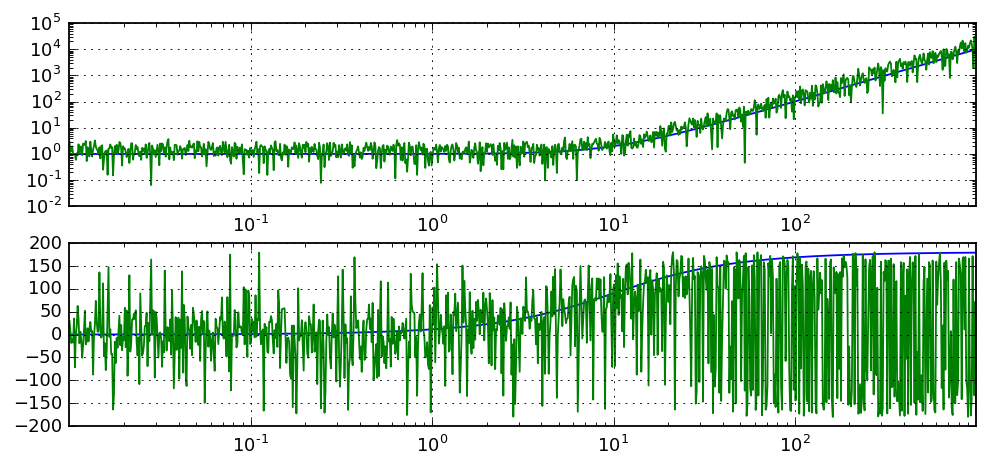

In [4]:
sys = system.BGSystem(
    F_AC = logspaced(0.01, 1000, 1000)
)
sys.own.X1 = signals.SRationalFilter(
    #poles_c = (-2 - 10j, ),
    zeros_r = (-10, -10),
    gain    = 1,
)
sys.own.R1 = readouts.ACReadout(
    portN = sys.X1.ps_Out.o,
    portD = sys.X1.ps_In.i,
)

Fb = mplfigB(Nrows=2)
readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))

size = len(readoutI.F_Hz.val)
relscale = .9
AC_data = readoutI.AC_sensitivity * (1 
                                     + np.random.normal(0, relscale, size) 
                                     + 1j*np.random.normal(0, relscale, size))
Fb.ax0.loglog(readoutI.F_Hz.val, abs(AC_data))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(AC_data, deg = True))

print(sys.X1.ctree_as_yaml())

ShadowBunchN((DeepBunchSingleAssign({'0': -100, '1': -1}), DeepBunchSingleAssign({'gain': 1, 'delay': {'units': 'second', 'val': 0}}, vpath=('zeros_r',),)), idx=0)
ShadowBunchN((DeepBunchSingleAssign({'no_DC': False, 'preserve_plane': True}, vpath=('zeros_r',),), DeepBunchSingleAssign({'gain': 1, 'delay': {'units': 'second', 'val': 0}}, vpath=('zeros_r',),), DeepBunch({'0': MX(X1.zeros_r.0), '1': MX(X1.zeros_r.1)})), idx=0)
total_number:  1
total_sum:  1
total_pairs:  1
Final Ntotal T1:  1
Final Ntotal T2:  1
FINAL EXPR:  (1, 1)
FINAL EXPR:  (1, 1)
FINAL EXPR:  (1, 1)
Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        2
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only 

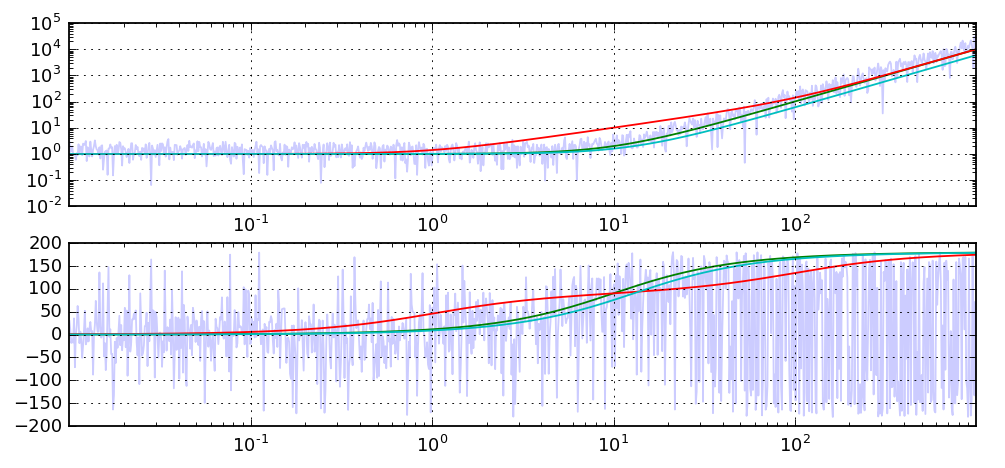

In [11]:
sys_fit = system.BGSystem(
    F_AC = logspaced(0.01, 1000, 1000)
)
sys_fit.own.X1 = signals.SRationalFilter(
    #poles_c = (-2 - 10j, ),
    zeros_r = (-100, -1),
    gain    = 1,
)
sys_fit.own.R1 = readouts.ACReadout(
    portN = sys.X1.ps_Out.o,
    portD = sys.X1.ps_In.i,
)

import phasor.fitting.casadi as FIT
import phasor.fitting.casadi.transfer_functions as FIT_TF
froot = FIT.FitterRoot()
froot.own.sym = FIT.FitterSym()
froot.systems.xfer = sys_fit
froot.sym.parameter(sys_fit.X1)
froot.own.fit_xfer = FIT_TF.TransferACExpression(
    ACReadout = sys_fit.R1,
    ACData = AC_data,
    SNR_weights = 1/relscale,
    residuals_model = 'debiased',
)

froot2 = froot.fit_xfer.minimize_function()

Fb = mplfigB(Nrows=2)
Fb.ax0.loglog(readoutI.F_Hz.val, abs(AC_data), alpha = .2)
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(AC_data, deg = True), alpha = .2)

readoutI =  sys.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))
readoutI =  sys_fit.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))
readoutI =  froot2.systems.xfer.R1
Fb.ax0.loglog(readoutI.F_Hz.val, abs(readoutI.AC_sensitivity))
Fb.ax1.semilogx(readoutI.F_Hz.val, np.angle(readoutI.AC_sensitivity, deg = True))


In [6]:
sys.ctree.X1

ShadowBunchN([DeepBunchSingleAssign(
        'no_DC' = False,
        'preserve_plane' = True,
        'zeros_r' = {'0': -10, '1': -10},
        )
    DeepBunchSingleAssign(
        'delay' = {'units': 'second', 'val': 0},
        'gain' = 1,
        )
    ])